Importação das bibliotecas necessárias

In [196]:
import numpy as np  # linear algebra
import pandas as pd  # data processing
import seaborn as sns  # visual data


from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor  # ML models
from sklearn.linear_model import Lasso  # ML model
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV  # Hyperparameter search
from sklearn.ensemble import StackingRegressor  # Stacking for linear regression
%matplotlib inline

Leitura da base

In [197]:
def data_read():
    df = pd.read_csv(r'CancerTreatmentCosts.csv', header=None)
    col_index = df.iloc[3, :].values  # Salvando os nomes das features para depois.
    df = df.iloc[4:, :].reset_index(drop=True)
    df.columns = col_index  # Retornando os nomes das features
    print("***"*5)
    print(f"The fixed data:\n {df.info(verbose=True, show_counts=True)}")
    return df

# **1 - Exploração e Entendimento dos Dados (EDA - Exploratory Data Analysis)**

a. Carregando os dados e verificando as primeiras e últimas linhas para ter uma ideia inicial da estrutura e dos tipos de dados (categóricos, numéricos).

In [198]:
df = data_read()
df.rename(columns={'Annual Cost Increase (applied to initial and last phases)': 'Annual Cost Increase'}, inplace=True) # Diminuindo o nome da coluna

***************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1254 entries, 0 to 1253
Data columns (total 10 columns):
 #   Column                                                     Non-Null Count  Dtype 
---  ------                                                     --------------  ----- 
 0   Cancer Site                                                1254 non-null   object
 1   Year                                                       1254 non-null   object
 2   Sex                                                        1254 non-null   object
 3   Age                                                        1254 non-null   object
 4   Incidence and Survival Assumptions                         1254 non-null   object
 5   Annual Cost Increase (applied to initial and last phases)  1254 non-null   object
 6   Total Costs                                                1254 non-null   object
 7   Initial Year After Diagnosis Cost                          1254 non-null   object
 8   Co

In [199]:
df.head()

,Cancer Site,Year,Sex,Age,Incidence and Survival Assumptions,Annual Cost Increase,Total Costs,Initial Year After Diagnosis Cost,Continuing Phase Cost,Last Year of Life Cost
0,AllSites,2010,Both sexes,All ages,"Incidence, Survival at constant rate",0%,124565.6,40463.5,46642.8,37459.2
1,AllSites,2010,Both sexes,All ages,"Incidence follows recent trend, Survival constant",0%,122420.8,38552.7,46671.9,37196.3
2,AllSites,2010,Both sexes,All ages,"Survival follows recent trend, Incidence constant",0%,125397.7,40463.5,47136.3,37797.9
3,AllSites,2010,Both sexes,All ages,"Incidence, Survival follow recent trends",0%,123236.3,38552.7,47155.7,37527.8
4,AllSites,2010,Both sexes,All ages,"Incidence, Survival follow recent trends",2%,123236.3,38552.7,47155.7,37527.8


In [200]:
df.tail()

,Cancer Site,Year,Sex,Age,Incidence and Survival Assumptions,Annual Cost Increase,Total Costs,Initial Year After Diagnosis Cost,Continuing Phase Cost,Last Year of Life Cost
1249,Other,2020,Both sexes,All ages,"Incidence follows recent trend, Survival constant",0%,26945.7,4432.4,14156.5,8356.8
1250,Other,2020,Both sexes,All ages,"Survival follows recent trend, Incidence constant",0%,29975.9,4466.2,17675.7,7834.0
1251,Other,2020,Both sexes,All ages,"Incidence, Survival follow recent trends",0%,30892.3,4432.4,17275.7,9184.3
1252,Other,2020,Both sexes,All ages,"Incidence, Survival follow recent trends",2%,33201.2,5403.1,17275.7,10522.5
1253,Other,2020,Both sexes,All ages,"Incidence, Survival follow recent trends",5%,37522.8,7219.9,17275.7,13027.2


b. Analisando estatísticas descritivas básicas para entender a distribuição dos dados, médias, mediana, desvios padrão, valores mínimos e máximos. E verificação da presença de valores nulos.

In [201]:
df.describe()

,Cancer Site,Year,Sex,Age,Incidence and Survival Assumptions,Annual Cost Increase,Total Costs,Initial Year After Diagnosis Cost,Continuing Phase Cost,Last Year of Life Cost
count,1254,1254,1254,1254,1254,1254,1254,1254,1254,1254
unique,19,11,3,1,4,3,1203,788,829,1195
top,AllSites,2010,Both sexes,All ages,"Incidence, Survival follow recent trends",0%,1546.0,762.4,355.7,760.2
freq,66,114,990,1254,627,836,3,4,4,4


In [202]:
def data_inquiry(df):
    print(f'A base tem {df.isna().sum().sum()} NaNs')
    for col in df.iloc[:, :-3]:  # percorrendo as colunas para verificar valores repetidos, menos os 3 últimos numéricos.
        print("Column: ", col, df[col].unique())

In [203]:
data_inquiry(df)

A base tem 0 NaNs
Column:  Cancer Site ['AllSites' 'Bladder' 'Brain' 'Breast' 'Cervix' 'Colorectal' 'Esophagus'
 'Head_Neck' 'Kidney' 'Leukemia' 'Lung' 'Lymphoma' 'Melanoma' 'Ovary'
 'Pancreas' 'Prostate' 'Stomach' 'Uterus' 'Other']
Column:  Year ['2010' '2011' '2012' '2013' '2014' '2015' '2016' '2017' '2018' '2019'
 '2020']
Column:  Sex ['Both sexes' 'Females' 'Males']
Column:  Age ['All ages']
Column:  Incidence and Survival Assumptions ['Incidence, Survival at constant rate'
 'Incidence follows recent trend, Survival constant'
 'Survival follows recent trend, Incidence constant'
 'Incidence, Survival follow recent trends']
Column:  Annual Cost Increase ['0%' '2%' '5%']
Column:  Total Costs ['124565.6' '122420.8' '125397.7' ... '30892.3' '33201.2' '37522.8']


c. Verificação de presença de valores ausentes ou nulos

In [204]:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])  # Exibir apenas colunas com valores nulos

Series([], dtype: int64)


d. Análise Visual

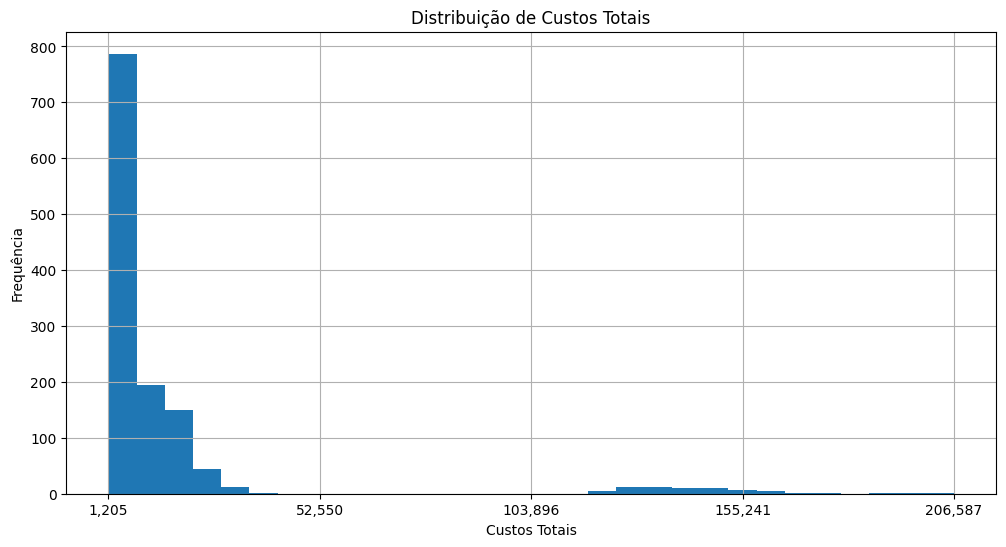

In [205]:
# Histogramas

import matplotlib.pyplot as plt
import numpy as np

# Histograma para a idade não é necessário, pois nessa base de dados não estão separadas as idades

# Supondo que os valores possam ter vírgulas para milhares, vamos remover e converter para float
df['Total Costs'] = df['Total Costs'].replace('[\$,]', '', regex=True).astype(float)

# Calcula pontos relevantes para o eixo X
min_cost = df['Total Costs'].min()
max_cost = df['Total Costs'].max()
step = (max_cost - min_cost) / 4  # Divide o intervalo total em quatro partes iguais
xticks = np.arange(min_cost, max_cost + step, step)  # Gera cinco pontos para os rótulos

# Cria o histograma
df['Total Costs'].hist(bins=30)  # Reduz o número de bins para simplificar a visualização
plt.title('Distribuição de Custos Totais')
plt.xlabel('Custos Totais')
plt.ylabel('Frequência')

# Define os rótulos personalizados para o eixo X
plt.xticks(xticks, [f"{x:,.0f}" for x in xticks])  # Formata os rótulos para serem mais legíveis

# Ajusta o tamanho da figura para melhor visualização
plt.gcf().set_size_inches(12, 6)
plt.show()

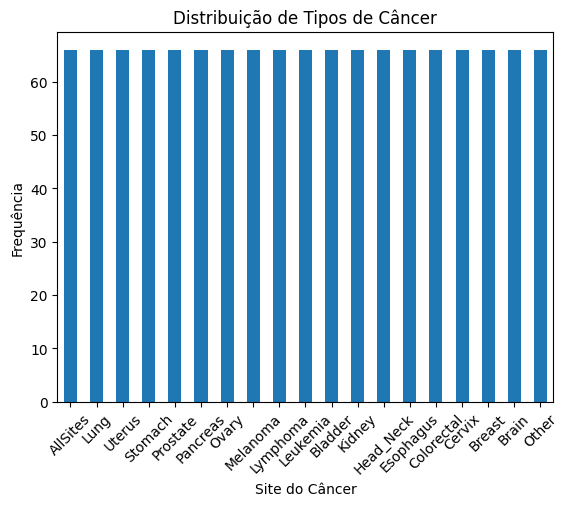

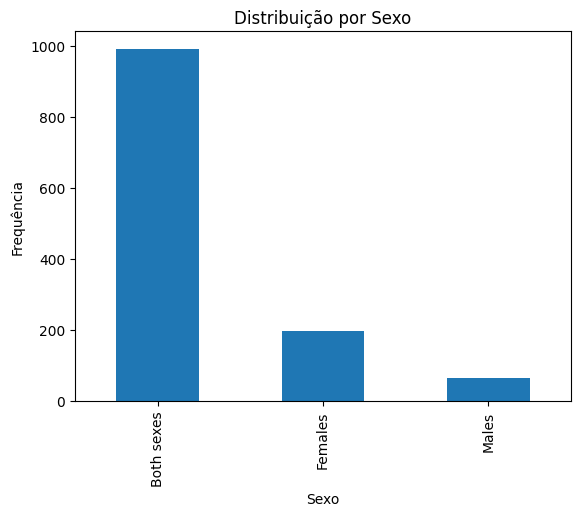

In [206]:
# Gráficos de Barras para Variáveis Categóricas

# Gráfico de barras para Cancer Site
df['Cancer Site'].value_counts().plot(kind='bar')
plt.title('Distribuição de Tipos de Câncer')
plt.xlabel('Site do Câncer')
plt.ylabel('Frequência')
plt.xticks(rotation=45)  # Rotação dos rótulos para melhor visualização
plt.show()

# Gráfico de barras para o Sexo
df['Sex'].value_counts().plot(kind='bar')
plt.title('Distribuição por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Frequência')
plt.show()

#66 linhas para cada tipo de cancer, aparentemente

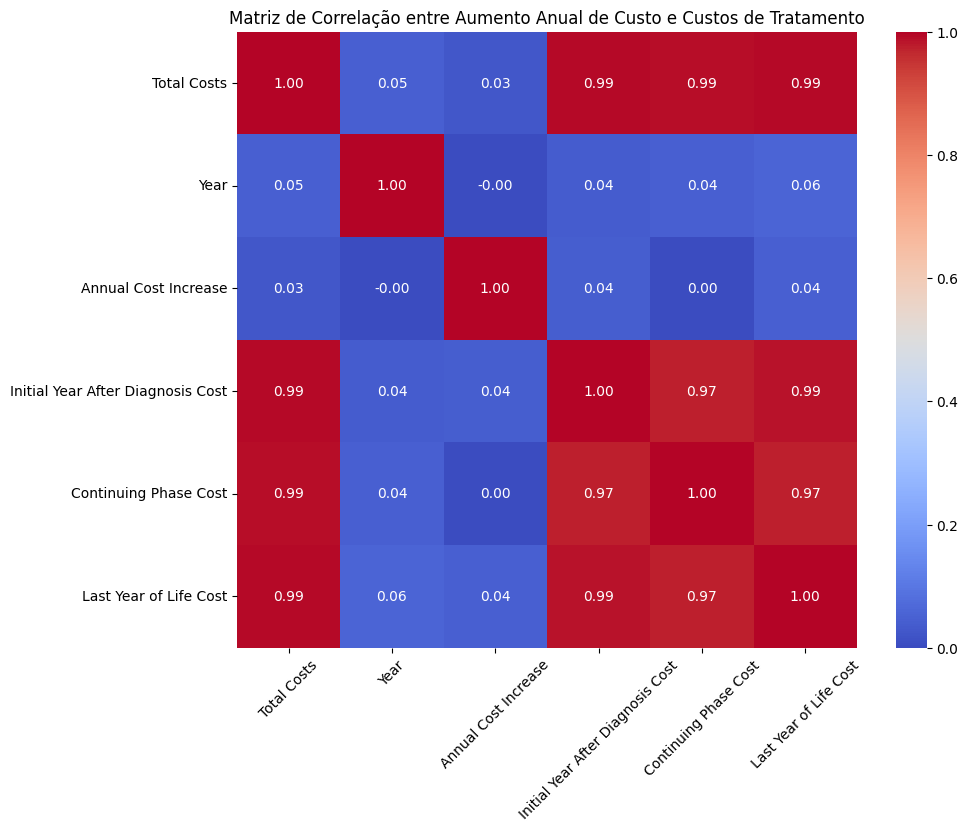

In [207]:
# Matriz de Correlação

import seaborn as sns

df['Annual Cost Increase'] = df['Annual Cost Increase'].replace('%', '', regex=True).astype(float) / 100
df['Total Costs'] = df['Total Costs'].replace('[\$,]', '', regex=True).astype(float)
df['Initial Year After Diagnosis Cost'] = df['Initial Year After Diagnosis Cost'].replace('[\$,]', '', regex=True).astype(float)
df['Continuing Phase Cost'] = df['Continuing Phase Cost'].replace('[\$,]', '', regex=True).astype(float)
df['Last Year of Life Cost'] = df['Last Year of Life Cost'].replace('[\$,]', '', regex=True).astype(float)

# Selecionar apenas as colunas relevantes para correlação
relevant_columns = ['Total Costs', 'Year', 'Annual Cost Increase', 'Initial Year After Diagnosis Cost', 'Continuing Phase Cost', 'Last Year of Life Cost']
correlation_matrix = df[relevant_columns].corr()

# Visualizar a matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação entre Aumento Anual de Custo e Custos de Tratamento')
plt.xticks(rotation=45)
plt.show()

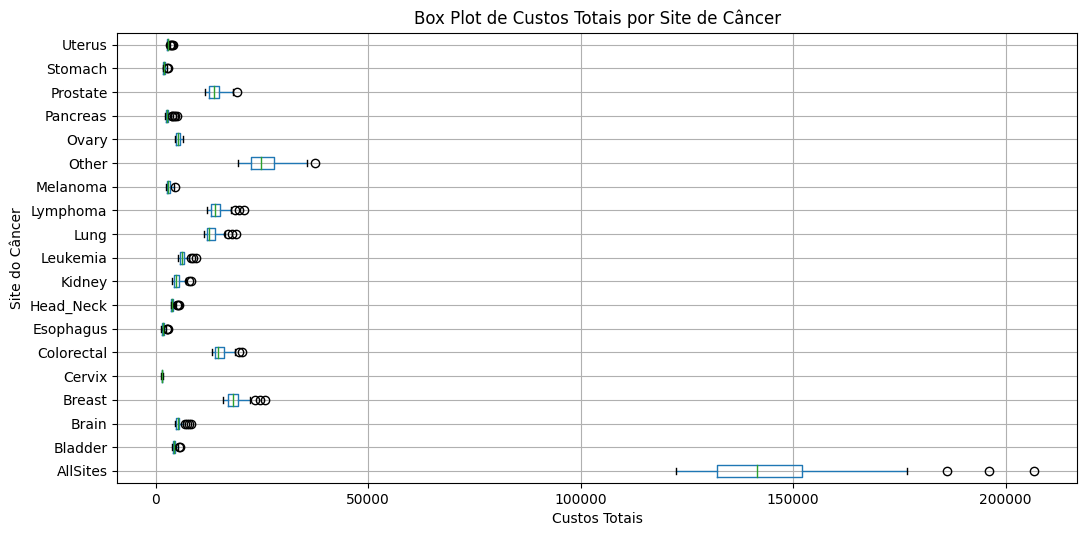

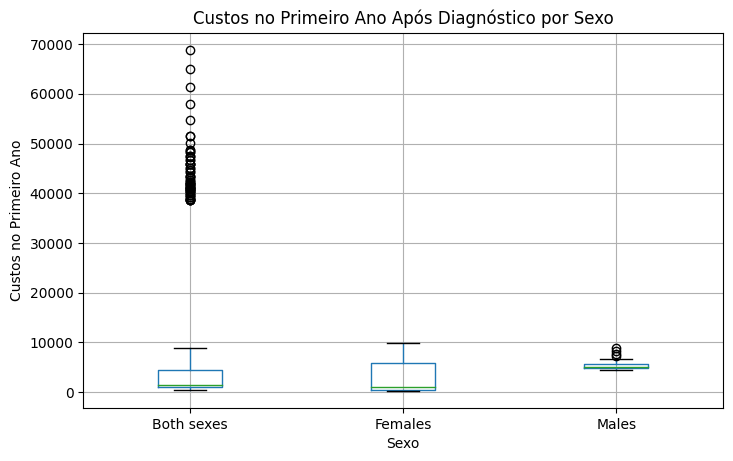

In [208]:
#Box polots

import pandas as pd
import matplotlib.pyplot as plt

# Supondo que as colunas podem ter vírgulas, pontos ou outros caracteres não numéricos.
df['Total Costs'] = df['Total Costs'].replace('[\$,]', '', regex=True).astype(float)
df['Initial Year After Diagnosis Cost'] = df['Initial Year After Diagnosis Cost'].replace('[\$,]', '', regex=True).astype(float)

# Box plot dos custos totais por site do câncer
df.boxplot(column='Total Costs', by='Cancer Site', figsize=(12, 6), vert=False)
plt.title('Box Plot de Custos Totais por Site de Câncer')
plt.xlabel('Custos Totais')
plt.ylabel('Site do Câncer')
plt.suptitle('')  # Remove the automatic 'Boxplot grouped by' title
plt.show()

# Box plot dos custos iniciais por sexo
df.boxplot(column='Initial Year After Diagnosis Cost', by='Sex', figsize=(8, 5))
plt.title('Custos no Primeiro Ano Após Diagnóstico por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Custos no Primeiro Ano')
plt.suptitle('')  # Remove the automatic 'Boxplot grouped by' title
plt.show()

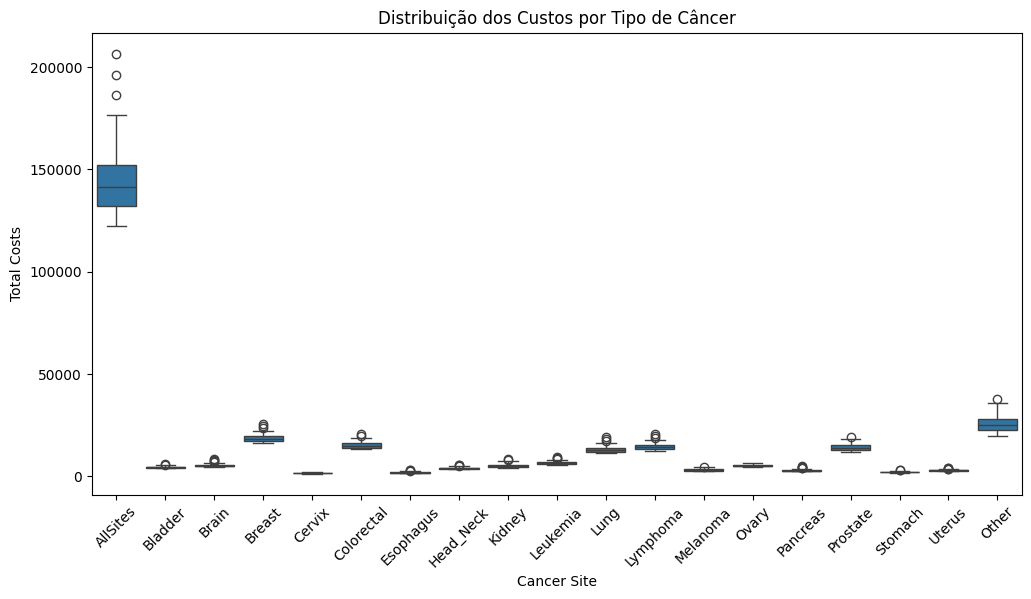

In [209]:
#Box plot da visualização dos tipos de cancer para os custos totais

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(x='Cancer Site', y='Total Costs', data=df)
plt.xticks(rotation=45)  # Rotação dos rótulos para melhor visualização
plt.title('Distribuição dos Custos por Tipo de Câncer')
plt.show()

In [210]:
import pandas as pd
import scipy.stats as stats

anova_results = stats.f_oneway(*[df[df['Cancer Site'] == category]['Total Costs'] for category in df['Cancer Site'].unique()])
print("ANOVA Result:", anova_results)

ANOVA Result: F_onewayResult(statistic=3796.9767776563294, pvalue=0.0)


O resultado da ANOVA com uma estatística F muito alta (3796.98) e um valor-p extremamente baixo (0.0) indica que há diferenças estatisticamente significativas nos custos totais médios entre os diferentes tipos de câncer. Isso significa que o tipo de câncer é um fator que influencia de maneira significativa os custos de tratamento.

# **2 - Pré-processamento de Dados**

a. Limpeza de dados

In [211]:
# Como visto na alalise da data base, não há valores nulos nessa base, então não é necessária a remoção destes

In [212]:
# Verificar duplicatas
duplicated_rows = df.duplicated()
duplicated_rows

0       False
1       False
2       False
3       False
4       False
        ...  
1249    False
1250    False
1251    False
1252    False
1253    False
Length: 1254, dtype: bool

In [213]:
# Remover duplicatas (não tem nenhuma)
df = df.drop_duplicates()
df

,Cancer Site,Year,Sex,Age,Incidence and Survival Assumptions,Annual Cost Increase,Total Costs,Initial Year After Diagnosis Cost,Continuing Phase Cost,Last Year of Life Cost
0,AllSites,2010,Both sexes,All ages,"Incidence, Survival at constant rate",0.00,124565.6,40463.5,46642.8,37459.2
1,AllSites,2010,Both sexes,All ages,"Incidence follows recent trend, Survival constant",0.00,122420.8,38552.7,46671.9,37196.3
2,AllSites,2010,Both sexes,All ages,"Survival follows recent trend, Incidence constant",0.00,125397.7,40463.5,47136.3,37797.9
3,AllSites,2010,Both sexes,All ages,"Incidence, Survival follow recent trends",0.00,123236.3,38552.7,47155.7,37527.8
4,AllSites,2010,Both sexes,All ages,"Incidence, Survival follow recent trends",0.02,123236.3,38552.7,47155.7,37527.8
...,...,...,...,...,...,...,...,...,...,...
1249,Other,2020,Both sexes,All ages,"Incidence follows recent trend, Survival constant",0.00,26945.7,4432.4,14156.5,8356.8
1250,Other,2020,Both sexes,All ages,"Survival follows recent trend, Incidence constant",0.00,29975.9,4466.2,17675.7,7834.0
1251,Other,2020,Both sexes,All ages,"Incidence, Survival follow recent trends",0.00,30892.3,4432.4,17275.7,9184.3
1252,Other,2020,Both sexes,All ages,"Incidence, Survival follow recent trends",0.02,33201.2,5403.1,17275.7,10522.5


In [214]:
# Verificando e removendo outliers com z-score

from scipy import stats

# Calcular Z-score para cada valor
z_scores = np.abs(stats.zscore(df['Total Costs']))
# Definir limite para considerar outliers (geralmente 3)
threshold = 3
# Remover linhas com Z-score acima do limite
df = df[(z_scores < threshold)]
# df = df[(z_scores < threshold) & (z_scores > -threshold)] (se quisermos considerar também os valores abaixo da média)

df

,Cancer Site,Year,Sex,Age,Incidence and Survival Assumptions,Annual Cost Increase,Total Costs,Initial Year After Diagnosis Cost,Continuing Phase Cost,Last Year of Life Cost
6,Bladder,2010,Both sexes,All ages,"Incidence, Survival at constant rate",0.00,3980.7,978.7,1895.8,1106.3
7,Bladder,2010,Both sexes,All ages,"Incidence follows recent trend, Survival constant",0.00,3885.2,923.3,1872.3,1089.7
8,Bladder,2010,Both sexes,All ages,"Survival follows recent trend, Incidence constant",0.00,3987.7,978.7,1900.2,1108.8
9,Bladder,2010,Both sexes,All ages,"Incidence, Survival follow recent trends",0.00,3891.9,923.3,1876.5,1092.2
10,Bladder,2010,Both sexes,All ages,"Incidence, Survival follow recent trends",0.02,3891.9,923.3,1876.5,1092.2
...,...,...,...,...,...,...,...,...,...,...
1249,Other,2020,Both sexes,All ages,"Incidence follows recent trend, Survival constant",0.00,26945.7,4432.4,14156.5,8356.8
1250,Other,2020,Both sexes,All ages,"Survival follows recent trend, Incidence constant",0.00,29975.9,4466.2,17675.7,7834.0
1251,Other,2020,Both sexes,All ages,"Incidence, Survival follow recent trends",0.00,30892.3,4432.4,17275.7,9184.3
1252,Other,2020,Both sexes,All ages,"Incidence, Survival follow recent trends",0.02,33201.2,5403.1,17275.7,10522.5


O Z-score (ou escore Z) é uma medida estatística que indica quantos desvios padrão um ponto de dados está longe da média de um conjunto de dados. Um Z-score positivo indica que o ponto de dados está acima da média, enquanto um Z-score negativo indica que está abaixo da média. Quanto maior o valor absoluto do Z-score, mais incomum é o ponto de dados em relação ao resto dos dados. Neste teste, consideramos apenas os valorea acima da média.

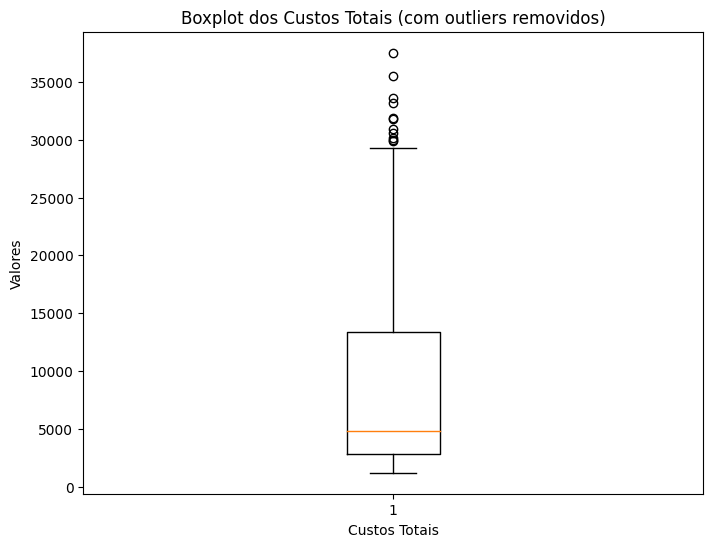

In [215]:
import matplotlib.pyplot as plt

# Plotar boxplot para 'Total Costs'
plt.figure(figsize=(8, 6))
plt.boxplot(df['Total Costs'])
plt.title('Boxplot dos Custos Totais (com outliers removidos)')
plt.xlabel('Custos Totais')
plt.ylabel('Valores')
plt.show()

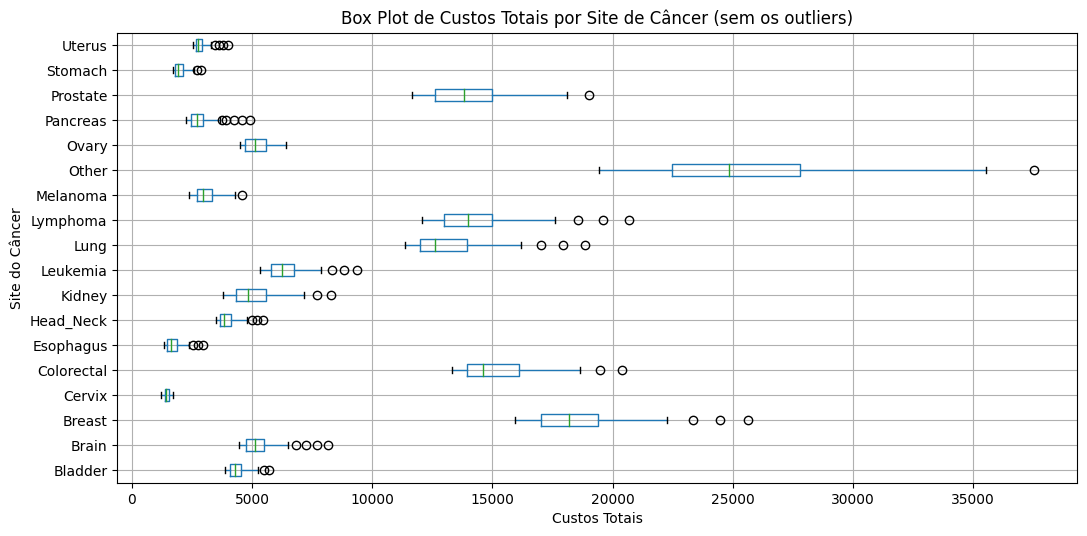

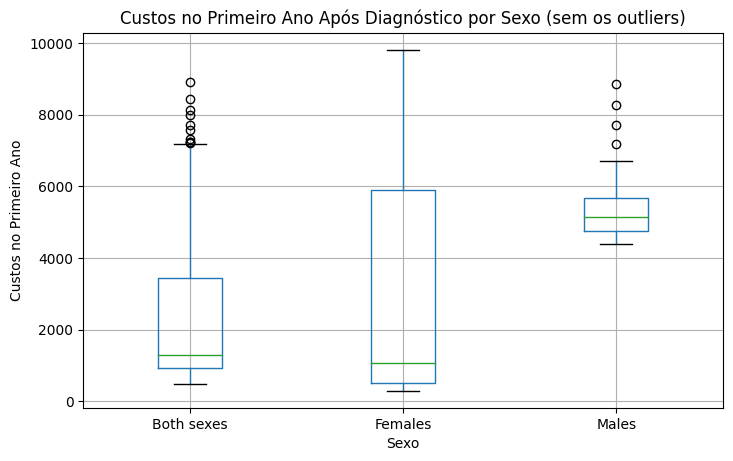

In [216]:
# Box plot dos custos totais SEM OS OUTLIERS iniciais por tipo de câncer
df.boxplot(column='Total Costs', by='Cancer Site', figsize=(12, 6), vert=False)
plt.title('Box Plot de Custos Totais por Site de Câncer (sem os outliers)')
plt.xlabel('Custos Totais')
plt.ylabel('Site do Câncer')
plt.suptitle('')  # Remove the automatic 'Boxplot grouped by' title
plt.show()

# Box plot dos custos iniciais SEM OS OUTLIERS INICIAIS por sexo
df.boxplot(column='Initial Year After Diagnosis Cost', by='Sex', figsize=(8, 5))
plt.title('Custos no Primeiro Ano Após Diagnóstico por Sexo (sem os outliers)')
plt.xlabel('Sexo')
plt.ylabel('Custos no Primeiro Ano')
plt.suptitle('')  # Remove the automatic 'Boxplot grouped by' title
plt.show()

In [217]:
# Removendo a coluna 'Age', pois só tem 1 tipo e não especifica as idades, portanto não será útil
df.drop('Age', axis=1, inplace=True)

<ipython-input-217-2ae8b8ee1fbd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('Age', axis=1, inplace=True)


b. Transformação de dados / Normalização e padronização (Feature Engineering)

In [218]:
# Listando os valores únicos para cada coluna categórica
unique_cancer_sites = df['Cancer Site'].unique()
unique_sexes = df['Sex'].unique()
unique_incidence_and_survival = df['Incidence and Survival Assumptions'].unique()

print("Unique Cancer Sites:", unique_cancer_sites)
print("Unique Sexes:", unique_sexes)
print("Unique Incidence and Survival Assumptions:", unique_incidence_and_survival)

Unique Cancer Sites: ['Bladder' 'Brain' 'Breast' 'Cervix' 'Colorectal' 'Esophagus' 'Head_Neck'
 'Kidney' 'Leukemia' 'Lung' 'Lymphoma' 'Melanoma' 'Ovary' 'Pancreas'
 'Prostate' 'Stomach' 'Uterus' 'Other']
Unique Sexes: ['Both sexes' 'Females' 'Males']
Unique Incidence and Survival Assumptions: ['Incidence, Survival at constant rate'
 'Incidence follows recent trend, Survival constant'
 'Survival follows recent trend, Incidence constant'
 'Incidence, Survival follow recent trends']


In [219]:
# Removendo linhas onde 'Cancer Site' é 'AllSites', pois é uma definição muito genérica, que até inutiliza o restante das definições
df = df[df['Cancer Site'] != 'AllSites']

# Verificando os valores únicos remanescentes para garantir que 'AllSites' foi removido
print(df['Cancer Site'].unique())

['Bladder' 'Brain' 'Breast' 'Cervix' 'Colorectal' 'Esophagus' 'Head_Neck'
 'Kidney' 'Leukemia' 'Lung' 'Lymphoma' 'Melanoma' 'Ovary' 'Pancreas'
 'Prostate' 'Stomach' 'Uterus' 'Other']


In [220]:
df

,Cancer Site,Year,Sex,Incidence and Survival Assumptions,Annual Cost Increase,Total Costs,Initial Year After Diagnosis Cost,Continuing Phase Cost,Last Year of Life Cost
6,Bladder,2010,Both sexes,"Incidence, Survival at constant rate",0.00,3980.7,978.7,1895.8,1106.3
7,Bladder,2010,Both sexes,"Incidence follows recent trend, Survival constant",0.00,3885.2,923.3,1872.3,1089.7
8,Bladder,2010,Both sexes,"Survival follows recent trend, Incidence constant",0.00,3987.7,978.7,1900.2,1108.8
9,Bladder,2010,Both sexes,"Incidence, Survival follow recent trends",0.00,3891.9,923.3,1876.5,1092.2
10,Bladder,2010,Both sexes,"Incidence, Survival follow recent trends",0.02,3891.9,923.3,1876.5,1092.2
...,...,...,...,...,...,...,...,...,...
1249,Other,2020,Both sexes,"Incidence follows recent trend, Survival constant",0.00,26945.7,4432.4,14156.5,8356.8
1250,Other,2020,Both sexes,"Survival follows recent trend, Incidence constant",0.00,29975.9,4466.2,17675.7,7834.0
1251,Other,2020,Both sexes,"Incidence, Survival follow recent trends",0.00,30892.3,4432.4,17275.7,9184.3
1252,Other,2020,Both sexes,"Incidence, Survival follow recent trends",0.02,33201.2,5403.1,17275.7,10522.5


In [221]:
from sklearn.preprocessing import LabelEncoder

# Criando um dicionário para armazenar os mapeamentos
label_mappings = {}

# Codificando 'Cancer Site' e armazenando o mapeamento
encoder = LabelEncoder()
df['Cancer Site'] = encoder.fit_transform(df['Cancer Site'])
label_mappings['Cancer Site'] = {index: label for index, label in enumerate(encoder.classes_)}

# Codificando 'Sex' e armazenando o mapeamento
encoder = LabelEncoder()
df['Sex'] = encoder.fit_transform(df['Sex'])
label_mappings['Sex'] = {index: label for index, label in enumerate(encoder.classes_)}

# Codificando 'Incidence and Survival Assumptions' e armazenando o mapeamento
encoder = LabelEncoder()
df['Incidence and Survival Assumptions'] = encoder.fit_transform(df['Incidence and Survival Assumptions'])
label_mappings['Incidence and Survival Assumptions'] = {index: label for index, label in enumerate(encoder.classes_)}

# Exibindo os mapeamentos
for column, mapping in label_mappings.items():
    print(f"Mapeamento para {column}: {mapping}")

Mapeamento para Cancer Site: {0: 'Bladder', 1: 'Brain', 2: 'Breast', 3: 'Cervix', 4: 'Colorectal', 5: 'Esophagus', 6: 'Head_Neck', 7: 'Kidney', 8: 'Leukemia', 9: 'Lung', 10: 'Lymphoma', 11: 'Melanoma', 12: 'Other', 13: 'Ovary', 14: 'Pancreas', 15: 'Prostate', 16: 'Stomach', 17: 'Uterus'}
Mapeamento para Sex: {0: 'Both sexes', 1: 'Females', 2: 'Males'}
Mapeamento para Incidence and Survival Assumptions: {0: 'Incidence follows recent trend, Survival constant', 1: 'Incidence, Survival at constant rate', 2: 'Incidence, Survival follow recent trends', 3: 'Survival follows recent trend, Incidence constant'}


In [222]:
from sklearn.preprocessing import LabelEncoder

# Criando um objeto LabelEncoder
encoder = LabelEncoder()

# Codificando 'Cancer Site'
df['Cancer Site'] = encoder.fit_transform(df['Cancer Site'])
print("Encoded Cancer Sites:", df['Cancer Site'].unique())

# Criando outro LabelEncoder para 'Sex'
df['Sex'] = encoder.fit_transform(df['Sex'])
print("Encoded Sexes:", df['Sex'].unique())

# Criando outro LabelEncoder para 'Incidence and Survival Assumptions'
df['Incidence and Survival Assumptions'] = encoder.fit_transform(df['Incidence and Survival Assumptions'])
print("Encoded Incidence and Survival Assumptions:", df['Incidence and Survival Assumptions'].unique())

Encoded Cancer Sites: [ 0  1  2  3  4  5  6  7  8  9 10 11 13 14 15 16 17 12]
Encoded Sexes: [0 1 2]
Encoded Incidence and Survival Assumptions: [1 0 3 2]


Dicionário dos mapeamentos correspondentes:

Mapeamento para Cancer Site: 0: 'Bladder', 1: 'Brain', 2: 'Breast', 3: 'Cervix', 4: 'Colorectal', 5: 'Esophagus', 6: 'Head_Neck', 7: 'Kidney', 8: 'Leukemia', 9: 'Lung', 10: 'Lymphoma', 11: 'Melanoma', 12: 'Other', 13: 'Ovary', 14: 'Pancreas', 15: 'Prostate', 16: 'Stomach', 17: 'Uterus'


---


Mapeamento para Sex:
0: 'Both sexes', 1: 'Females', 2: 'Males'


---


Mapeamento para Incidence and Survival Assumptions:
0: 'Incidence follows recent trend, Survival constant', 1: 'Incidence, Survival at constant rate', 2: 'Incidence, Survival follow recent trends', 3: 'Survival follows recent trend, Incidence constant'

In [223]:
df # visualizando dados normalizados

,Cancer Site,Year,Sex,Incidence and Survival Assumptions,Annual Cost Increase,Total Costs,Initial Year After Diagnosis Cost,Continuing Phase Cost,Last Year of Life Cost
6,0,2010,0,1,0.00,3980.7,978.7,1895.8,1106.3
7,0,2010,0,0,0.00,3885.2,923.3,1872.3,1089.7
8,0,2010,0,3,0.00,3987.7,978.7,1900.2,1108.8
9,0,2010,0,2,0.00,3891.9,923.3,1876.5,1092.2
10,0,2010,0,2,0.02,3891.9,923.3,1876.5,1092.2
...,...,...,...,...,...,...,...,...,...
1249,12,2020,0,0,0.00,26945.7,4432.4,14156.5,8356.8
1250,12,2020,0,3,0.00,29975.9,4466.2,17675.7,7834.0
1251,12,2020,0,2,0.00,30892.3,4432.4,17275.7,9184.3
1252,12,2020,0,2,0.02,33201.2,5403.1,17275.7,10522.5


c. Divisão de Dados

In [224]:
from sklearn.model_selection import train_test_split

# Definindo as variáveis independentes (features) e a variável dependente (target)
X = df.drop('Total Costs', axis=1)  # removendo a coluna de custo total para usá-la como target
y = df['Total Costs']

# Dividindo os dados em conjunto de treinamento e de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificação das dimensões dos conjuntos resultantes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (950, 8)
X_test shape: (238, 8)
y_train shape: (950,)
y_test shape: (238,)


# 3. Modelagem

### Etapas:
* Escolha do Modelo:
Regressão Linear, que é fácil de implementar e interpretar.

* Importação da Classe do Modelo:
Importar a classe do modelo de regressão linear do scikit-learn.

* Criação do Modelo:
Instanciar um modelo de regressão linear.

* Treinamento do Modelo:
Ajustar esse modelo aos dados de treinamento.

* Avaliação do Modelo:
Avaliar o desempenho do modelo utilizando os dados de teste.

**REGRESSÃO LINEAR**

In [225]:
# Importar a classe do modelo
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Criar uma instância do modelo
model = LinearRegression()

# Treinar o modelo com os dados de treinamento
model.fit(X_train, y_train)

# Prever os custos no conjunto de teste
y_pred = model.predict(X_test)

# Avaliação do modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}") # Mean Squared Error (MSE): é a média dos quadrados dos erros entre valores preditos e reais. Quanto menor o MSE, melhor é o modelo.
print(f"R-squared (R2): {r2}") # R-squared (R2): é uma medida estatística que representa a proporção da variância para a variável dependente que é previsível a partir das variáveis independentes.
                               # Um valor de R2 mais próximo de 1 indica um modelo muito eficaz.

Mean Squared Error (MSE): 0.00338822977174691
R-squared (R2): 0.999999999935307


Esses resultados sugerem que o modelo é extremamente preciso em prever os custos com base nas variáveis fornecidas. No entanto, também é possível que esses resultados possam indicar um ajuste excessivo (overfitting), especialmente quando o R² é tão próximo de 1.
* Uma forma de verificar se há overfitting é realizar validação cruzada. Isso envolve dividir os dados em várias subamostras e realizar o treinamento e a validação várias vezes. Se o desempenho em amostras diferentes varia significativamente, isso pode indicar overfitting.
* Comparar o desempenho do modelo nos dados de treinamento e teste. Se o modelo se comporta excepcionalmente bem nos dados de treinamento mas pior nos dados de teste, isso pode ser um sinal de overfitting.

# Visualização dos resultados

**Gráfico de Dispersão dos Valores Previstos vs. Valores Reais**

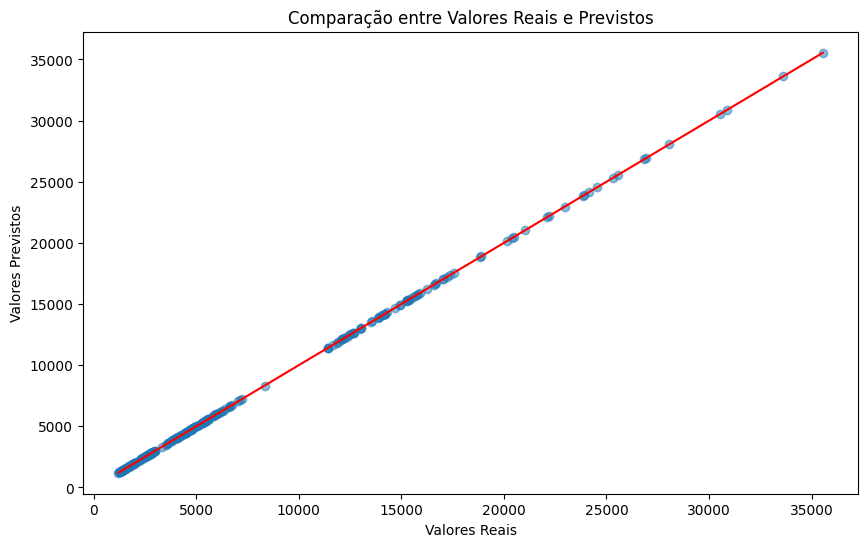

In [226]:
# Esse gráfico ajuda a entender quão próximos os valores previstos estão dos valores reais. Pontos próximos à linha diagonal indicam boas previsões.

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Comparação entre Valores Reais e Previstos')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Linha diagonal
plt.show()

**Gráfico de Resíduos**

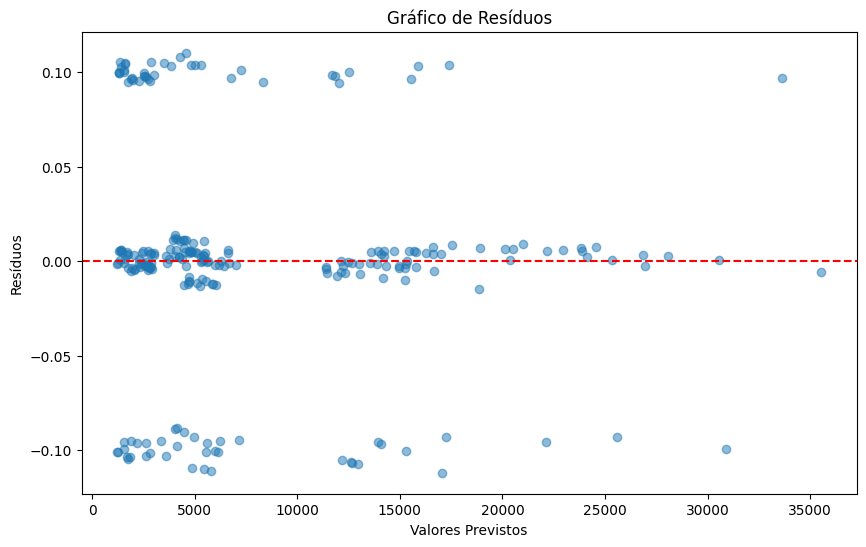

In [227]:
# Este gráfico mostra a diferença entre os valores previstos e os reais (resíduos) e pode ajudar a identificar padrões nos erros que podem indicar problemas no modelo, como não-linearidade.

residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.title('Gráfico de Resíduos')
plt.xlabel('Valores Previstos')
plt.ylabel('Resíduos')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()

### Verificação da eficácia do modelo

**OVERFITTING**

In [228]:
# Validação Cruzada

# Vamos seguir com a implementação da validação cruzada k-fold. Neste método, os dados são divididos em k subconjuntos (ou "folds").
# O modelo é treinado em k-1 desses folds, com o fold restante usado para teste. Esse processo é repetido k vezes, com cada fold sendo usado uma vez como teste.

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import numpy as np

# Aplicação da validação cruzada
# cv=10 significa que estamos usando 10 folds
# scoring='neg_mean_squared_error' para avaliar o MSE
scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')

# Calculando a média e o desvio padrão dos scores para avaliar a variação
mean_mse = np.mean(scores)
std_mse = np.std(scores)

print("MSE médio: ", -mean_mse)  # Negativo porque o sklearn retorna negativo para erro
print("Desvio padrão do MSE: ", std_mse)

MSE médio:  0.0032265533614492525
Desvio padrão do MSE:  0.00039413178430718656


Por mais que os resultados sejam bons, o  modelo ainda pode estar ajustando-se excessivamente aos dados de treino, mas mantendo uma performance similar em subconjuntos variados de dados devido a outras características dos dados ou do modelo. Portanto será comparado o modelo com treinamento e teste.

***OBS: RODAR A CÉLULA DA MONTAGEM DA REGRESSÃO LINEAR E DEPOIS RODAR A CÉLULA ABAIXO***

In [229]:
# Comparação do desempenho do modelo nos dados de treinamento e teste (OBS: RODAR A CÉLULA DA MONTAGEM DA REGRESSÃO LINEAR E DEPOIS RODAR ESTA CÉLULA)

from sklearn.metrics import mean_squared_error, r2_score

# Previsões nos dados de treinamento
y_train_pred = model.predict(X_train)

# Previsões nos dados de teste
y_test_pred = model.predict(X_test)

# Calcular MSE e R² para o conjunto de treinamento
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Calcular MSE e R² para o conjunto de teste
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Imprimir os resultados
print("Desempenho no Conjunto de Treinamento:")
print("MSE (Treino):", mse_train)
print("R² (Treino):", r2_train)

print("\nDesempenho no Conjunto de Teste:")
print("MSE (Teste):", mse_test)
print("R² (Teste):", r2_test)

Desempenho no Conjunto de Treinamento:
MSE (Treino): 0.003158392178906876
R² (Treino): 0.9999999999318665

Desempenho no Conjunto de Teste:
MSE (Teste): 0.00338822977174691
R² (Teste): 0.999999999935307


* MSE (Treino) vs MSE (Teste): O Erro Quadrático Médio (MSE) é ligeiramente maior no conjunto de teste do que no conjunto de treinamento. Esta é uma indicação normal de que o modelo não está perfeitamente ajustado aos dados de teste, mas a diferença é mínima, indicando que o modelo está generalizando muito bem.
* R² (Treino) vs R² (Teste): Os valores de R² são extremamente altos e praticamente idênticos em ambos os conjuntos, sugerindo que o modelo explica quase toda a variância nos dados, tanto em treinamento quanto em teste. Isto é indicativo de um ajuste excelente.

# **Bônus: Validação Cruzada de diferentes modelos utilizando Hiperparâmetros**

Modelos utilizados para a comparação:

**AdaBoostRegressor:** Combina várias versões de um mesmo modelo fraco para melhorar a precisão. Boa generalização, resistência ao overfitting.

**GradientBoostingRegressor:** Cria um conjunto de modelos que se corrigem em relação aos erros dos anteriores. Boa precisão em dados complexos, resistência ao overfitting.

**RandomForestRegressor:** Combina várias árvores de decisão para reduzir o overfitting e melhorar a precisão. Eficaz em dados heterogêneos e com muitas características.

**Lasso (Pipeline com RobustScaler e Lasso):** Reduz a magnitude dos coeficientes menos importantes para seleção automática de características. Útil para seleção de características, boa performance em dados com muitas características e outliers.

***obs: A otimização de hiperparâmetros é um processo que busca encontrar os valores ideais para os parâmetros do modelo, de modo a melhorar seu desempenho (é um processo demorado e custoso em questão de hardware)***

Exemplo básico:

In [230]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Criando o modelo
rf = RandomForestRegressor()

# Criando o objeto GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Treinando o modelo com os diferentes hiperparâmetros
grid_search.fit(X_train, y_train)
print("Melhores hiperparâmetros:", grid_search.best_params_)

Melhores hiperparâmetros: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}


In [231]:
# Para comparação: teste sem utilizar hiperparâmetros e sua otimização individual:

def cross_val_models_SemHiperparametros(x_train, y_train, cv_param=5):
    ABR = AdaBoostRegressor()
    GBR = GradientBoostingRegressor()
    RF = RandomForestRegressor()
    Las = make_pipeline(RobustScaler(), Lasso(alpha=0.0005, random_state=1))
    # Lasso is better used with RobustScaler and pipeline, thus we gave him his own parameters

    # best_est = hyperparam(ABR, GBR, RF)

    GBR = GradientBoostingRegressor()   # Surprisingly we got better results using the default parameters
    ABR = AdaBoostRegressor(learning_rate=1, loss='square', n_estimators=100)
    RF = RandomForestRegressor(max_depth=8, n_estimators=600)
    models = [ABR, GBR, RF, Las]
    for model in models:    # Cross validation of the train data with the different models
        cv_results = -cross_val_score(model, x_train, y_train, cv=cv_param, scoring='neg_mean_squared_error')
        mean_cv = cv_results.mean()
        model_name = type(model).__name__
        if model_name == 'Pipeline':
            model_name = 'Lasso'
        print(f'The mean_squared_error for {model_name} is {mean_cv}')
    return models

cross_val_models_SemHiperparametros(X_train, y_train, 6)

The mean_squared_error for AdaBoostRegressor is 705057.5526429798
The mean_squared_error for GradientBoostingRegressor is 90838.11992023553
The mean_squared_error for RandomForestRegressor is 125044.52427829332
The mean_squared_error for Lasso is 0.08865318771700487


[AdaBoostRegressor(learning_rate=1, loss='square', n_estimators=100),
 GradientBoostingRegressor(),
 RandomForestRegressor(max_depth=8, n_estimators=600),
 Pipeline(steps=[('robustscaler', RobustScaler()),
                 ('lasso', Lasso(alpha=0.0005, random_state=1))])]

**Teste com função coletada do autor deste data frame**, com os hiperparâmetros dos modelos, usando a busca exaustiva de GridSearchCV. Aqui é testado várias combinações de hiperparâmetros para cada modelo e retornado os modelos otimizados, ou seja, é otimizado manualmente com um Loop para testar cada parâmetro para cada modelo, encontrando os hiperparametros. O GridSearchCV então testa todas as combinações da grade para encontrar os melhores hiperparâmetros, portanto é mais preciso e extremamente demorado.

In [232]:
'''def hyperparam(ABR, GBR, RF):
    RF_param = {
        'max_depth': [4, 6, 8],
        'max_features': ['auto', 'sqrt'],
        'min_samples_leaf': [1, 2, 4],
        'min_samples_split': [2, 5, 10],
        'n_estimators': [200, 400, 600, 800]}
    GB_param = {
        "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
        "min_samples_split": np.linspace(0.1, 0.5, 12),
        "min_samples_leaf": np.linspace(0.1, 0.5, 12),
        "max_depth": [3, 5, 8],
        "max_features": ["log2", "sqrt"],
        "criterion": ["friedman_mse", "mae"],
        "subsample": [0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
        "n_estimators": [10]}
    AB_param = {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.05, 0.1, 0.3, 1],
        'loss': ['linear', 'square', 'exponential']}
    param_list = [RF_param, GB_param, AB_param]
    model_list = [RF, GBR, ABR]
    best_est = []
    for param, model in zip(param_list, model_list):
        clf = GridSearchCV(model, param, n_jobs=-1, scoring='neg_mean_squared_error')
        clf.fit(X_train, y_train)
        print(clf.best_estimator_)
        best_est.append(clf)
    return best_est

def cross_val_models(x_train, y_train, cv_param=5):
    ABR = AdaBoostRegressor()
    GBR = GradientBoostingRegressor()
    RF = RandomForestRegressor()
    Las = make_pipeline(RobustScaler(), Lasso(alpha=0.0005, random_state=1))
    # Lasso is better used with RobustScaler and pipeline, thus we gave him his own parameters

    best_est = hyperparam(ABR, GBR, RF)  # otimização de hiperparâmetros dos modelos ABR, GBR e RF.

    GBR = GradientBoostingRegressor()   # Surprisingly we got better results using the default parameters
    ABR = AdaBoostRegressor(learning_rate=1, loss='square', n_estimators=100)
    RF = RandomForestRegressor(max_depth=8, n_estimators=600)
    models = [ABR, GBR, RF, Las]
    for model in models:    # Cross validation of the train data with the different models
        cv_results = -cross_val_score(model, x_train, y_train, cv=cv_param, scoring='neg_mean_squared_error')
        mean_cv = cv_results.mean()
        model_name = type(model).__name__
        if model_name == 'Pipeline':
            model_name = 'Lasso'
        print(f'The mean_squared_error for {model_name} is {mean_cv}')
    return models

cross_val_models(X_train, y_train, 5)'''

'def hyperparam(ABR, GBR, RF):\n    RF_param = {\n        \'max_depth\': [4, 6, 8],\n        \'max_features\': [\'auto\', \'sqrt\'],\n        \'min_samples_leaf\': [1, 2, 4],\n        \'min_samples_split\': [2, 5, 10],\n        \'n_estimators\': [200, 400, 600, 800]}\n    GB_param = {\n        "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],\n        "min_samples_split": np.linspace(0.1, 0.5, 12),\n        "min_samples_leaf": np.linspace(0.1, 0.5, 12),\n        "max_depth": [3, 5, 8],\n        "max_features": ["log2", "sqrt"],\n        "criterion": ["friedman_mse", "mae"],\n        "subsample": [0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],\n        "n_estimators": [10]}\n    AB_param = {\n        \'n_estimators\': [50, 100],\n        \'learning_rate\': [0.01, 0.05, 0.1, 0.3, 1],\n        \'loss\': [\'linear\', \'square\', \'exponential\']}\n    param_list = [RF_param, GB_param, AB_param]\n    model_list = [RF, GBR, ABR]\n    best_est = []\n    for param, model in zip(param_list,

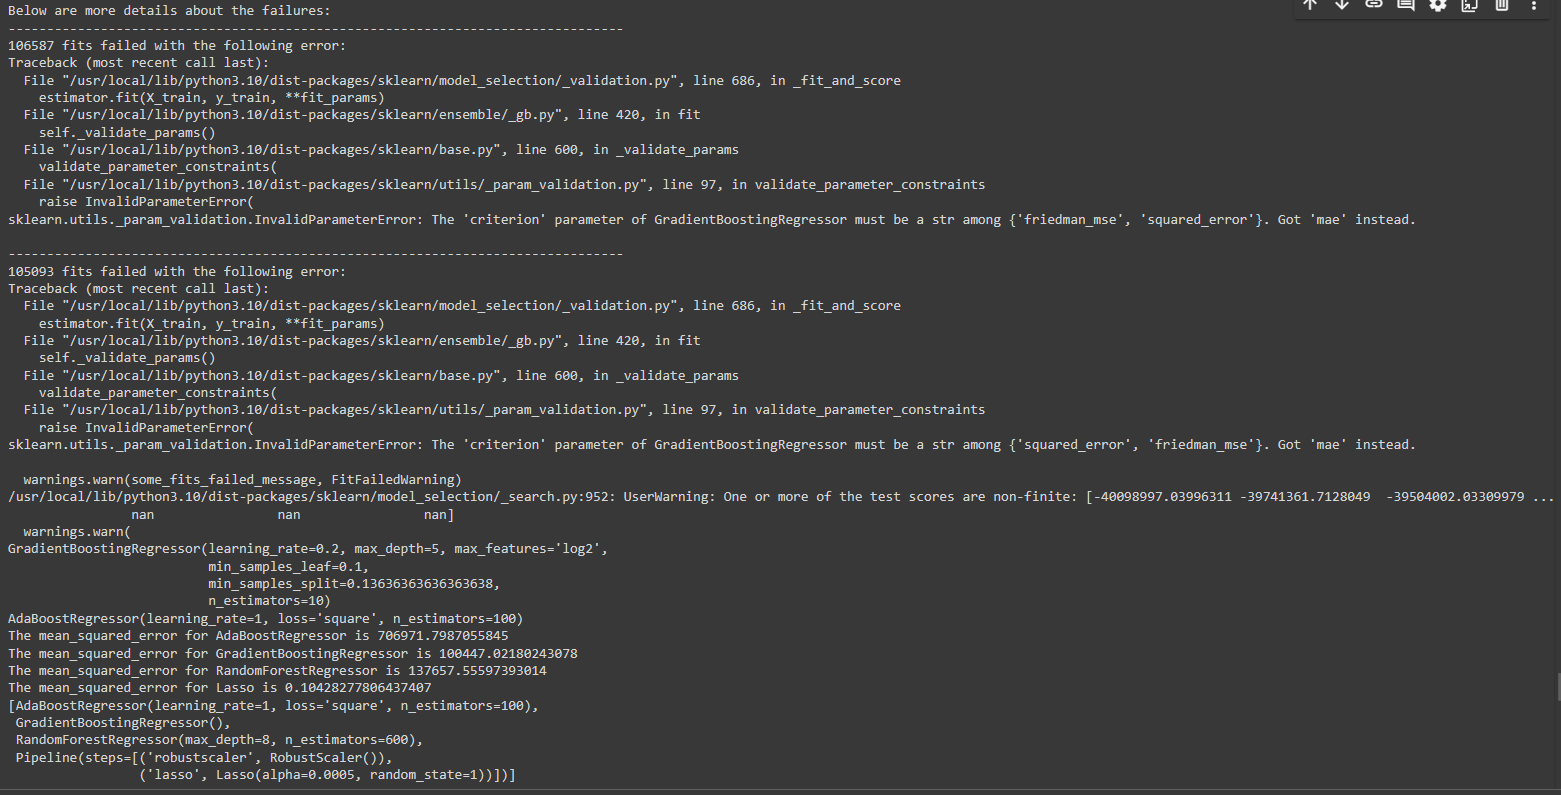

Teste com código adaptado, sem loop para encontrar os melhores parâmetros manualmente, com uma grade menor de parâmetros, muito mais rápido:

In [233]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import Lasso

def cross_val_models_adaptado(x_train, y_train, cv_param=5):
    # Definindo os modelos
    ABR = AdaBoostRegressor()
    GBR = GradientBoostingRegressor()
    RF = RandomForestRegressor()

    # Definindo os parâmetros para otimização de hiperparâmetros
    param_grid_ABR = {'n_estimators': [50, 100, 200], 'learning_rate': [0.1, 0.5, 1.0]}
    param_grid_GBR = {'n_estimators': [50, 100, 200], 'learning_rate': [0.1, 0.5, 1.0]}
    param_grid_RF = {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20]}

    # Criando objetos GridSearchCV para cada modelo
    grid_search_ABR = GridSearchCV(estimator=ABR, param_grid=param_grid_ABR, cv=cv_param, scoring='neg_mean_squared_error')
    grid_search_GBR = GridSearchCV(estimator=GBR, param_grid=param_grid_GBR, cv=cv_param, scoring='neg_mean_squared_error')
    grid_search_RF = GridSearchCV(estimator=RF, param_grid=param_grid_RF, cv=cv_param, scoring='neg_mean_squared_error')

    # Lista de modelos a serem avaliados
    models = [(grid_search_ABR, 'AdaBoostRegressor'), (grid_search_GBR, 'GradientBoostingRegressor'), (grid_search_RF, 'RandomForestRegressor')]

    for grid_search, model_name in models:
        grid_search.fit(x_train, y_train)
        mean_cv = -grid_search.best_score_  # Negativo pois estamos usando scoring='neg_mean_squared_error'
        print(f'The mean_squared_error for {model_name} is {mean_cv}')

    return models

cross_val_models_adaptado(X_train, y_train, 5)

The mean_squared_error for AdaBoostRegressor is 797698.5995700525
The mean_squared_error for GradientBoostingRegressor is 81322.4716526623
The mean_squared_error for RandomForestRegressor is 114236.73919878705


[(GridSearchCV(cv=5, estimator=AdaBoostRegressor(),
               param_grid={'learning_rate': [0.1, 0.5, 1.0],
                           'n_estimators': [50, 100, 200]},
               scoring='neg_mean_squared_error'),
  'AdaBoostRegressor'),
 (GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
               param_grid={'learning_rate': [0.1, 0.5, 1.0],
                           'n_estimators': [50, 100, 200]},
               scoring='neg_mean_squared_error'),
  'GradientBoostingRegressor'),
 (GridSearchCV(cv=5, estimator=RandomForestRegressor(),
               param_grid={'max_depth': [None, 10, 20],
                           'n_estimators': [100, 200, 300]},
               scoring='neg_mean_squared_error'),
  'RandomForestRegressor')]

A otimização de hiperparâmetros nem sempre resultará em uma melhoria no desempenho do modelo. Isso depende da natureza dos dados, dos algoritmos e dos hiperparâmetros em questão.

No caso feito, o GradientBoostingRegressor e o RandomForestRegressor mostraram uma melhoria após a otimização, enquanto o AdaBoostRegressor teve um desempenho pior. E o teste feito pelo autor do data frame também obteve o mesmo resultado.

A principal razão para o tempo de execução mais longo da função **hyperparam** é o processo de busca exaustiva de GridSearchCV. Esse processo testa todas as combinações possíveis de hiperparâmetros na grade especificada. Dependendo do tamanho da grade de hiperparâmetros e do número de modelos a serem otimizados, isso pode levar a um tempo de execução significativamente mais longo em comparação com a validação cruzada simples feita na função adaptada **cross_val_models**.

Todos os valores obtidos nesse teste de validação cruzada com outros **modelos** não foram satisfatórios, talvez porque a divisão dos dados não foi adequada para os modelos utilizados.

# Bônus: testando XGBoostRegressor

In [238]:
from xgboost import XGBRegressor

X_train.drop('Year', axis=1, inplace=True) # mesmo convertendo para int, ele nao deixa eu usar o year por algum motivo
X_test.drop('Year', axis=1, inplace=True)

xgb_regressor = XGBRegressor(n_estimators=100, max_depth=3, learning_rate=0.1)

xgb_regressor.fit(X_train, y_train)

y_pred = xgb_regressor.predict(X_test)

In [239]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 64193.37637181859
R-squared (R2): 0.9987743269025618
